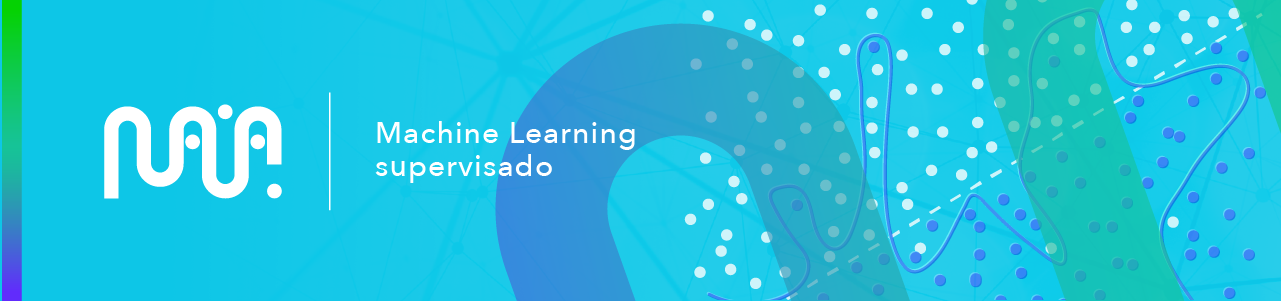

# Taller 3. Solución de un problema de clasificación
***MLS. Machine learning supervisado***
<br>***Semana 3, Taller calificable:*** *Redes neuronales*
<br> **Profesor:** *Fernando Lozano* - **Autor Notebook:** *Mónica Gantiva*

## Introducción
### Descripción
Este *jupyter notebook* contine el material para el desarrollo del taller calificable de la Semana 3 del curso *Machine Learning supervisado*. En esta actividad se abordará un problema de clasificación binaria simple que implementará un perceptron multinivel y en donde se debe seleccionar el mejor modelo.

#### Objetivos de Aprendizaje
* Entrenar una red neuronal para resolver problemas de clasificación y regresión. 
* Seleccionar apropiadamente parámetros en el algoritmo de backpropagation y sus variantes. 
* Evaluar y comparar modelos de redes neuronales con diferentes arquitecturas 

### Teoría

Un modelo de clasificación de una red neuronal es un tipo de arquitectura de redes neuronales diseñada específicamente para abordar problemas de clasificación. Las redes neuronales son sistemas de aprendizaje automático inspirados en la estructura y funcionamiento del cerebro humano, y se han vuelto muy populares en una variedad de aplicaciones, incluida la clasificación de datos. En un modelo de clasificación de red neuronal, la red está configurada para tomar datos de entrada y asignarlos a diferentes categorías o clases. A medida que los datos de entrada fluyen a través de la red, se someten a una serie de operaciones matemáticas que incluyen multiplicaciones de matrices, aplicaciones de funciones de activación y ajuste de pesos. Estas operaciones permiten que la red aprenda automáticamente patrones y relaciones en los datos que son relevantes para la clasificación.

## Metodología

A continuación, se plantea un caso de clasificación binaria en el cual se busca diagnosticar si un tumor de cancer de seno es benigno o no. Inicialmente se importarán los datos de entrenamiento y prueba y se dará un ejemplo de solución del problema. Se implementarán dos estructuras diferentes de redes neuronales. Para cada estructura se evaluará su rendimiento al aplicar optimizadores como Adagrad, RMSprop y Adam. Usted deberá revisar el ejemplo y solucionar el problema para las dos estructuras propuestas y los optimizadores RMSprop y Adam.

Para ello, deberá editar las celdas de código dispuestas para esto. Estas estarán marcadas con el siguiente comentario:

In [ ]:
# =====================================================
# COMPLETAR ===========================================
# 

# =====================================================

Edite o complete el código dentro de estas líneas de comentarios. Dentro de estos comentarios encontrará indicaciones de lo que debe hacer, así como algunas de las variables que debe utilizar o calcular (puede que estas tengan ya una estructura para llenar o no, revise y complete la asignación).

# Ejemplo de clasificación binaria
En este caso se busca clasificar tumores de cáncer de seno en dos posible categorías: benigno o maligno. Para ello, se tiene una base de datos con características de tumores de pacientes provenientes de Wisconsin. Esta base de datos ha sido tomada de [1]. Para realizar esta clasificación se iniciará con un modelo de regresión logística


[1]https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset


### Inicialización

In [1]:
#Cargamos la librerías a usar
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers

### Cargamos los datos 
Al cargar los datos, se observa que se tienen parámetros numéricos que reflejan características clínicas de los tumores. Estos parámetros serán empleados como nuestras variables independientes. En este caso, el parámetro "outcome" corresponde a nuestra variable objetivo, que sería el diagnóstico.

In [2]:
data = pd.read_csv('breast_cancer.csv').drop(columns='Unnamed: 0')
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### Dívidimos los datos 
Se realiza la separación de las variables X y Y, así como de los sets de entrenamiento y prueba de los modelos a emplear.

In [3]:
X= data.drop(columns='outcome')
y= data['outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, train_size=0.8)


## Clasificación con red neuronal
### Arquitectura 1: (5,5,5)
Iniciaremos aplicando una red neuronal que implementa tres capas ocultas, cada capa cuenta con 5 neuronas. Estableceremos un máximo de 200 iteraciones en esta red. En esta sección crearemos el modelo, lo entrenaremos y evaluaremos su desempeño con los sets de datos para entrenamiento y prueba, respectivamente. Para evaluar su desempeño calculamos la precisión del modelo y su matríz de confusión.

Precisión del modelo: 0.9736842105263158
Matriz de confusión:


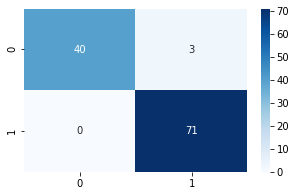

In [4]:
# Creamos el modelo de red neuronal
modelRD = MLPClassifier(hidden_layer_sizes=(5,5,5),max_iter=200, random_state=42, solver='lbfgs')

#Entrenamiento del modelo 
modelRD.fit(X_train, y_train)

#Predicciones para los datos de prueba
y_predRD = modelRD.predict(X_test)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_predRD)
print("Precisión del modelo:", accuracy)

# Calculamos la matriz de confusión del modelo
confusion = confusion_matrix(y_test, y_predRD)
print("Matriz de confusión:")
plt.figure(figsize=(5, 3))
sns.heatmap(confusion, cmap = 'Blues',annot = True)
plt.show()

### Arquitectura 2: (8)
Ahora cambiaremos la arquitectura de la red. Emplearemos una red con una capa oculta que tendrá 8 neuronas. De igual manera que el ejemplo anterior, tendrá un máximo de 200 iteraciones.

Precisión del modelo: 0.9649122807017544
Matriz de confusión:


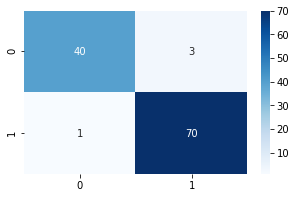

In [5]:
# Creamos el modelo de red neuronal
modelRD2 = MLPClassifier(hidden_layer_sizes=(8),max_iter=200, random_state=42, solver='lbfgs')

#Entrenamiento del modelo 
modelRD2.fit(X_train, y_train)

#Predicciones para los datos de prueba
y_predRD2 = modelRD2.predict(X_test)

# Calculamos la precisión del modelo
accuracy = accuracy_score(y_test, y_predRD2)
print("Precisión del modelo:", accuracy)

# Calculamos la matriz de confusión del modelo
confusion = confusion_matrix(y_test, y_predRD2)
print("Matriz de confusión:")
plt.figure(figsize=(5, 3))
sns.heatmap(confusion, cmap = 'Blues',annot = True)
plt.show()

## Implementación optimizador Adagrad
### Arquitectura 1:(5,5,5)
Ahora implementaremos una red neuronal con 3 capas ocultas y 5 neuronas en cada capa, la arquitectura 1, al igual que en el ejemplo anterior. Sin embargo, en este caso implementaremos el optimizador Adagrad. En este ejemplo usaremos keras para crear el modelo con el fin de hacer el seguimiento del costo y de la precisión del modelo en cada época de entrenamiento.

A continuación se muestra la creación del modelo y su entrenamiento durante 200 épocas.

In [6]:
#Creación y definición de la red neuronal
modelAdagrad = keras.Sequential()
#La primera capa necesita especificar la cantidad de columnas de datos
modelAdagrad.add(layers.Dense(31, kernel_initializer='uniform', activation = 'sigmoid',input_shape=(30,)))
modelAdagrad.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid'))
modelAdagrad.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid'))
modelAdagrad.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid'))
#La última capa de salida, por ser clasificación binaria, solo tiene una salida
modelAdagrad.add(layers.Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
#Definición del optimizador 
optAdagrad = keras.optimizers.Adagrad()
#Compila el modelo con una función de costo, y unas metricas para evaluar el modelo posteriormente
modelAdagrad.compile(loss='binary_crossentropy', optimizer=optAdagrad, metrics = [tf.keras.metrics.BinaryAccuracy()])

In [7]:
historyAdagrad = modelAdagrad.fit(X_train, y_train, epochs = 200)

Train on 455 samples
Epoch 1/200
455/455 [==============================] - 0s 946us/sample - loss: 0.6939 - binary_accuracy: 0.3714
Epoch 2/200
455/455 [==============================] - 0s 109us/sample - loss: 0.6928 - binary_accuracy: 0.6154
Epoch 3/200
455/455 [==============================] - 0s 38us/sample - loss: 0.6920 - binary_accuracy: 0.6286
Epoch 4/200
455/455 [==============================] - 0s 161us/sample - loss: 0.6912 - binary_accuracy: 0.6286
Epoch 5/200
455/455 [==============================] - 0s 57us/sample - loss: 0.6907 - binary_accuracy: 0.6286
Epoch 6/200
455/455 [==============================] - 0s 166us/sample - loss: 0.6901 - binary_accuracy: 0.6286
Epoch 7/200
455/455 [==============================] - 0s 47us/sample - loss: 0.6896 - binary_accuracy: 0.6286
Epoch 8/200
455/455 [==============================] - 0s 160us/sample - loss: 0.6892 - binary_accuracy: 0.6286
Epoch 9/200
455/455 [==============================] - 0s 42us/sample - loss: 0.6888 -

#### Evaluación del modelo
Para comprender el comportamiento del modelo visualizaremos los cambios que se pueden dar en el costo y la precisión en cada época y obtendremos su matríz de confusión. 

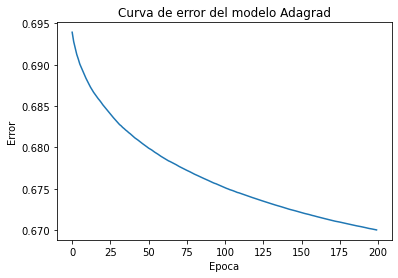

In [8]:
plt.plot(historyAdagrad.history['loss'])
plt.title('Curva de error del modelo Adagrad')
plt.ylabel('Error')
plt.xlabel('Epoca')
plt.show()

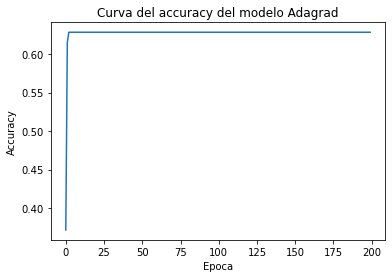

In [9]:
plt.plot(historyAdagrad.history['binary_accuracy'])
plt.title('Curva del accuracy del modelo Adagrad')
plt.ylabel('Accuracy')
plt.xlabel('Epoca')
plt.show()

Matriz de confusión:


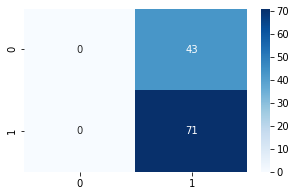

In [10]:
#Predicciones para los datos de prueba
y_pred = modelAdagrad.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


# Calculamos la matriz de confusión del modelo
confusion = confusion_matrix(y_test, y_pred_binary)
print("Matriz de confusión:")
plt.figure(figsize=(5, 3))
sns.heatmap(confusion, cmap = 'Blues',annot = True)
plt.show()

### Arquitectura 2: (8)
Modificamos la arquitectura de la red anterior para obtener una red con una capa oculta y 8 neuronas. A continuación crearemos el modelo, lo entrenaremos y evaluaremos su desempeño.

In [11]:
#Creación y definición de la red neuronal
modelAdagrad2 = keras.Sequential()
#La primera capa necesita especificar la cantidad de columnas de datos
modelAdagrad2.add(layers.Dense(30, kernel_initializer='uniform', activation = 'sigmoid',input_shape=(30,)))
modelAdagrad2.add(layers.Dense(8, kernel_initializer='uniform', activation = 'sigmoid'))
#La última capa de salida, por ser clasificación binaria, solo tiene una salida
modelAdagrad2.add(layers.Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
#Definición del optimizador 
optAdagrad = keras.optimizers.Adagrad()
#Compila el modelo con una función de costo, y unas metricas para evaluar el modelo posteriormente
modelAdagrad2.compile(loss='binary_crossentropy', optimizer=optAdagrad, metrics = [tf.keras.metrics.BinaryAccuracy()])

historyAdagrad = modelAdagrad2.fit(X_train, y_train, epochs = 200)

Train on 455 samples
Epoch 1/200
455/455 [==============================] - 0s 638us/sample - loss: 0.6871 - binary_accuracy: 0.6286
Epoch 2/200
455/455 [==============================] - 0s 38us/sample - loss: 0.6859 - binary_accuracy: 0.6286
Epoch 3/200
455/455 [==============================] - 0s 160us/sample - loss: 0.6848 - binary_accuracy: 0.6286
Epoch 4/200
455/455 [==============================] - 0s 43us/sample - loss: 0.6840 - binary_accuracy: 0.6286
Epoch 5/200
455/455 [==============================] - 0s 41us/sample - loss: 0.6833 - binary_accuracy: 0.6286
Epoch 6/200
455/455 [==============================] - 0s 157us/sample - loss: 0.6827 - binary_accuracy: 0.6286
Epoch 7/200
455/455 [==============================] - 0s 44us/sample - loss: 0.6822 - binary_accuracy: 0.6286
Epoch 8/200
455/455 [==============================] - 0s 154us/sample - loss: 0.6817 - binary_accuracy: 0.6286
Epoch 9/200
455/455 [==============================] - 0s 36us/sample - loss: 0.6812 - 

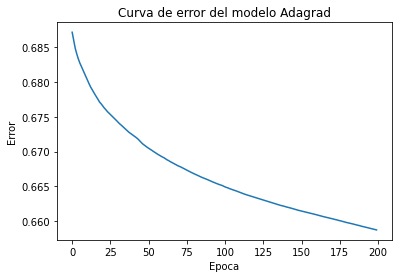

In [12]:
plt.plot(historyAdagrad.history['loss'])
plt.title('Curva de error del modelo Adagrad')
plt.ylabel('Error')
plt.xlabel('Epoca')
plt.show()

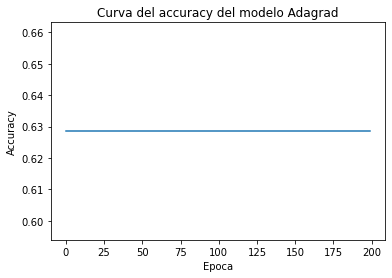

In [13]:
plt.plot(historyAdagrad.history['binary_accuracy'])
plt.title('Curva del accuracy del modelo Adagrad')
plt.ylabel('Accuracy')
plt.xlabel('Epoca')
plt.show()

Matriz de confusión:


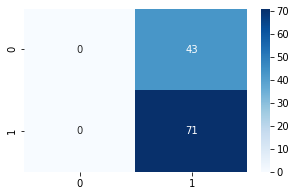

In [14]:
#Predicciones para los datos de prueba
y_pred = modelAdagrad.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)


# Calculamos la matriz de confusión del modelo
confusion = confusion_matrix(y_test, y_pred_binary)
print("Matriz de confusión:")
plt.figure(figsize=(5, 3))
sns.heatmap(confusion, cmap = 'Blues',annot = True)
plt.show()

# Ejercicio de aplicación
En esta sección usted deberá implementar las dos arquitecturas analizadas con los optimizadores RMSprop y Adam, generando cuatro modelos en total. Para cada modelo deberá visualizar el comportamiento del costo y la presición en cada época del entrenamiento (use un total de 200 épocas) y la matriz de confusión. Una vez obtenga estos resultados, compare el comportamiento entre arquitecturas y entre optimizadores.

## RMSprop 
### Arquitectura 1: (5,5,5)
Red con 3 capas ocultas, con 5 neuronas en cada capa, que implementa el optimizador RMSprop y tiene un máximo de 200 épocas.

In [15]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
#Creación y definición de la red neuronal
modelRMSprop = keras.Sequential()
#La primera capa necesita especificar la cantidad de columnas de datos
modelRMSprop.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid',input_shape=(30,)))
modelRMSprop.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid'))
modelRMSprop.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid'))
#La última capa de salida, por ser clasificación binaria, solo tiene una salida
modelRMSprop.add(layers.Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
#Definición del optimizador 
optRMSprop = keras.optimizers.RMSprop()
#Compila el modelo con una función de costo, y unas metricas para evaluar el modelo posteriormente
modelRMSprop.compile(loss='binary_crossentropy', optimizer=optRMSprop, metrics = [tf.keras.metrics.BinaryAccuracy()])
# =====================================================

In [16]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
historyRMSprop = modelRMSprop.fit(X_train, y_train, epochs = 200)
# =====================================================

Train on 455 samples
Epoch 1/200
455/455 [==============================] - 0s 1ms/sample - loss: 0.6915 - binary_accuracy: 0.5846
Epoch 2/200
455/455 [==============================] - 0s 178us/sample - loss: 0.6859 - binary_accuracy: 0.6286
Epoch 3/200
455/455 [==============================] - 0s 47us/sample - loss: 0.6819 - binary_accuracy: 0.6286
Epoch 4/200
455/455 [==============================] - 0s 175us/sample - loss: 0.6780 - binary_accuracy: 0.6286
Epoch 5/200
455/455 [==============================] - 0s 47us/sample - loss: 0.6743 - binary_accuracy: 0.6286
Epoch 6/200
455/455 [==============================] - 0s 172us/sample - loss: 0.6712 - binary_accuracy: 0.6286
Epoch 7/200
455/455 [==============================] - 0s 42us/sample - loss: 0.6681 - binary_accuracy: 0.6286
Epoch 8/200
455/455 [==============================] - 0s 177us/sample - loss: 0.6656 - binary_accuracy: 0.6286
Epoch 9/200
455/455 [==============================] - 0s 39us/sample - loss: 0.6636 - b

#### Evaluación del modelo

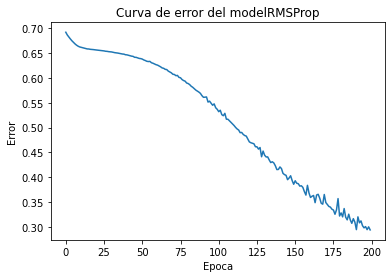

In [17]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyRMSprop.history['loss'])
plt.title('Curva de error del modelRMSProp')
plt.ylabel('Error')
plt.xlabel('Epoca')
plt.show()
# =====================================================

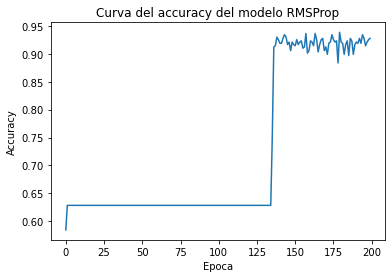

In [18]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyRMSprop.history['binary_accuracy'])
plt.title('Curva del accuracy del modelo RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Epoca')
plt.show()
# =====================================================

114/114 [==============================] - 0s 698us/sample - loss: 0.2675 - binary_accuracy: 0.9298
Test loss: 0.2675363776976602
Test accuracy: 0.9298246


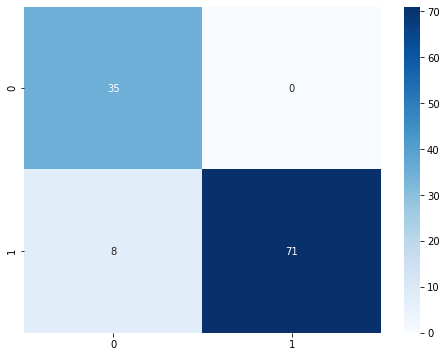

In [19]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
lossRMSprop, accuracyRMSprop = modelRMSprop.evaluate(X_test, y_test)
print('Test loss:', lossRMSprop)
print('Test accuracy:', accuracyRMSprop)
y_pred_RMSprop = modelRMSprop.predict_classes(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_pred_RMSprop,y_test), cmap = 'Blues',annot = True)
# =====================================================

### Arquitectura 2: (8)
Red con 1 capa oculta, con 8 neuronas, que implementa el optimizador RMSprop y tiene un máximo de 200 épocas.

In [20]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
# your code here
#Creación y definición de la red neuronal
modelRMSprop2 = keras.Sequential()
#La primera capa necesita especificar la cantidad de columnas de datos
modelRMSprop2.add(layers.Dense(8, kernel_initializer='uniform', activation = 'sigmoid',input_shape=(30,)))
#La última capa de salida, por ser clasificación binaria, solo tiene una salida
modelRMSprop2.add(layers.Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
#Definición del optimizador 
optRMSprop2 = keras.optimizers.RMSprop()
#Compila el modelo con una función de costo, y unas metricas para evaluar el modelo posteriormente
modelRMSprop2.compile(loss='binary_crossentropy', optimizer=optRMSprop2, metrics = [tf.keras.metrics.BinaryAccuracy()])

historyRMSprop2 = modelRMSprop2.fit(X_train, y_train, epochs = 200)
# =====================================================
# =====================================================

Train on 455 samples
Epoch 1/200
455/455 [==============================] - 0s 743us/sample - loss: 0.6782 - binary_accuracy: 0.8132
Epoch 2/200
455/455 [==============================] - 0s 124us/sample - loss: 0.6601 - binary_accuracy: 0.8637
Epoch 3/200
455/455 [==============================] - 0s 35us/sample - loss: 0.6444 - binary_accuracy: 0.8725
Epoch 4/200
455/455 [==============================] - 0s 151us/sample - loss: 0.6324 - binary_accuracy: 0.8703
Epoch 5/200
455/455 [==============================] - 0s 41us/sample - loss: 0.6199 - binary_accuracy: 0.8703
Epoch 6/200
455/455 [==============================] - 0s 38us/sample - loss: 0.6059 - binary_accuracy: 0.8747
Epoch 7/200
455/455 [==============================] - 0s 162us/sample - loss: 0.5979 - binary_accuracy: 0.8681
Epoch 8/200
455/455 [==============================] - 0s 40us/sample - loss: 0.5809 - binary_accuracy: 0.8857
Epoch 9/200
455/455 [==============================] - 0s 157us/sample - loss: 0.5715 -

#### Evaluación del modelo

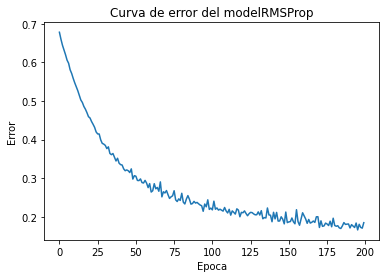

In [21]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyRMSprop2.history['loss'])
plt.title('Curva de error del modelRMSProp')
plt.ylabel('Error')
plt.xlabel('Epoca')
plt.show()
# =====================================================

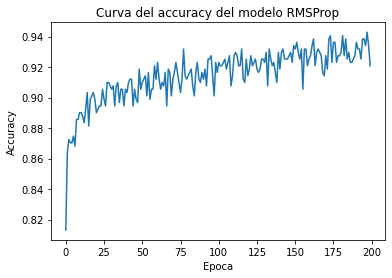

In [22]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyRMSprop2.history['binary_accuracy'])
plt.title('Curva del accuracy del modelo RMSProp')
plt.ylabel('Accuracy')
plt.xlabel('Epoca')
plt.show()
# =====================================================

114/114 [==============================] - 0s 532us/sample - loss: 0.1323 - binary_accuracy: 0.9386
Test loss: 0.132337659270617
Test accuracy: 0.9385965


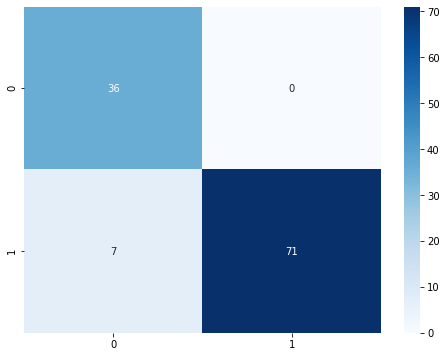

In [23]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
lossRMSprop2, accuracyRMSprop2 = modelRMSprop2.evaluate(X_test, y_test)
print('Test loss:', lossRMSprop2)
print('Test accuracy:', accuracyRMSprop2)
y_pred_RMSprop2 = modelRMSprop2.predict_classes(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_pred_RMSprop2,y_test), cmap = 'Blues',annot = True)
# =====================================================
# =====================================================

## Adam
### Arquitectura 1: (5,5,5)
Red con 3 capas ocultas, con 5 neuronas en cada capa, que implementa el optimizador Adam y tiene un máximo de 200 épocas.

In [24]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
#Creación y definición de la red neuronal
modelAdam = keras.Sequential()
#La primera capa necesita especificar la cantidad de columnas de datos
modelAdam.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid',input_shape=(30,)))
modelAdam.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid'))
modelAdam.add(layers.Dense(5, kernel_initializer='uniform', activation = 'sigmoid'))
#La última capa de salida, por ser clasificación binaria, solo tiene una salida
modelAdam.add(layers.Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
#Definición del optimizador 
optAdam = keras.optimizers.Adam()
#Compila el modelo con una función de costo, y unas metricas para evaluar el modelo posteriormente
modelAdam.compile(loss='binary_crossentropy', optimizer=optAdam, metrics = [tf.keras.metrics.BinaryAccuracy()])
# =====================================================

In [25]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
historyAdam = modelAdam.fit(X_train, y_train, epochs = 200)
# =====================================================

Train on 455 samples
Epoch 1/200
455/455 [==============================] - 0s 810us/sample - loss: 0.6850 - binary_accuracy: 0.6286
Epoch 2/200
455/455 [==============================] - 0s 39us/sample - loss: 0.6798 - binary_accuracy: 0.6286
Epoch 3/200
455/455 [==============================] - 0s 178us/sample - loss: 0.6764 - binary_accuracy: 0.6286
Epoch 4/200
455/455 [==============================] - 0s 41us/sample - loss: 0.6722 - binary_accuracy: 0.6286
Epoch 5/200
455/455 [==============================] - 0s 171us/sample - loss: 0.6699 - binary_accuracy: 0.6286
Epoch 6/200
455/455 [==============================] - 0s 39us/sample - loss: 0.6668 - binary_accuracy: 0.6286
Epoch 7/200
455/455 [==============================] - 0s 183us/sample - loss: 0.6648 - binary_accuracy: 0.6286
Epoch 8/200
455/455 [==============================] - 0s 46us/sample - loss: 0.6630 - binary_accuracy: 0.6286
Epoch 9/200
455/455 [==============================] - 0s 162us/sample - loss: 0.6614 -

#### Evaluación del modelo

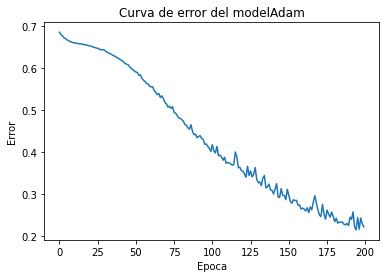

In [26]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyAdam.history['loss'])
plt.title('Curva de error del modelAdam')
plt.ylabel('Error')
plt.xlabel('Epoca')
plt.show()
# =====================================================

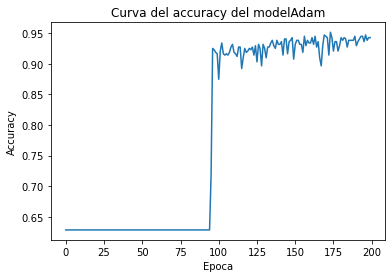

In [27]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyAdam.history['binary_accuracy'])
plt.title('Curva del accuracy del modelAdam')
plt.ylabel('Accuracy')
plt.xlabel('Epoca')
plt.show()
# =====================================================

114/114 [==============================] - 0s 635us/sample - loss: 0.1591 - binary_accuracy: 0.9737
Test loss: 0.15905035535494486
Test accuracy: 0.9736842


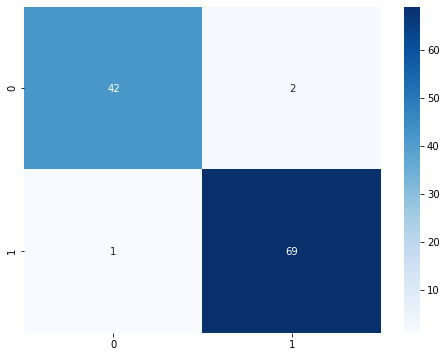

In [28]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
lossAdam, accuracyAdam = modelAdam.evaluate(X_test, y_test)
print('Test loss:', lossAdam)
print('Test accuracy:', accuracyAdam)
y_pred_Adam = modelAdam.predict_classes(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_pred_Adam,y_test), cmap = 'Blues',annot = True)
# =====================================================

### Arquitectura 2: (8)
Red con 1 capa oculta, con 8 neuronas, que implementa el optimizador Adam y tiene un máximo de 200 épocas.

In [29]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
#Creación y definición de la red neuronal
modelAdam2 = keras.Sequential()
#La primera capa necesita especificar la cantidad de columnas de datos
modelAdam2.add(layers.Dense(8, kernel_initializer='uniform', activation = 'sigmoid',input_shape=(30,)))
#La última capa de salida, por ser clasificación binaria, solo tiene una salida
modelAdam2.add(layers.Dense(1, kernel_initializer='uniform', activation = 'sigmoid'))
#Definición del optimizador 
optAdam2 = keras.optimizers.Adam()
#Compila el modelo con una función de costo, y unas metricas para evaluar el modelo posteriormente
modelAdam2.compile(loss='binary_crossentropy', optimizer=optAdam2, metrics = [tf.keras.metrics.BinaryAccuracy()])
# =====================================================
# =====================================================

In [30]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
historyAdam2 = modelAdam2.fit(X_train, y_train, epochs = 200)
# =====================================================

Train on 455 samples
Epoch 1/200
455/455 [==============================] - 0s 616us/sample - loss: 0.6879 - binary_accuracy: 0.5648
Epoch 2/200
455/455 [==============================] - 0s 80us/sample - loss: 0.6662 - binary_accuracy: 0.6286
Epoch 3/200
455/455 [==============================] - 0s 33us/sample - loss: 0.6517 - binary_accuracy: 0.6286
Epoch 4/200
455/455 [==============================] - 0s 36us/sample - loss: 0.6403 - binary_accuracy: 0.6286
Epoch 5/200
455/455 [==============================] - 0s 43us/sample - loss: 0.6303 - binary_accuracy: 0.6286
Epoch 6/200
455/455 [==============================] - 0s 44us/sample - loss: 0.6181 - binary_accuracy: 0.6286
Epoch 7/200
455/455 [==============================] - 0s 154us/sample - loss: 0.6080 - binary_accuracy: 0.6286
Epoch 8/200
455/455 [==============================] - 0s 40us/sample - loss: 0.5982 - binary_accuracy: 0.6286
Epoch 9/200
455/455 [==============================] - 0s 38us/sample - loss: 0.5938 - bi

#### Evaluación del modelo

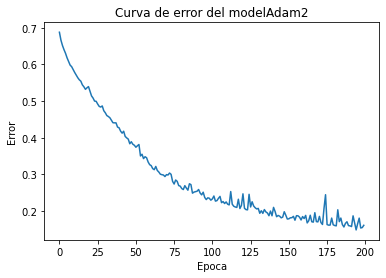

In [31]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyAdam2.history['loss'])
plt.title('Curva de error del modelAdam2')
plt.ylabel('Error')
plt.xlabel('Epoca')
plt.show()
# =====================================================

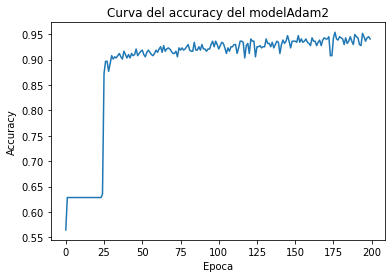

In [32]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
plt.plot(historyAdam2.history['binary_accuracy'])
plt.title('Curva del accuracy del modelAdam2')
plt.ylabel('Accuracy')
plt.xlabel('Epoca')
plt.show()
# =====================================================

114/114 [==============================] - 0s 551us/sample - loss: 0.1196 - binary_accuracy: 0.9825
Test loss: 0.11959972428648095
Test accuracy: 0.98245615


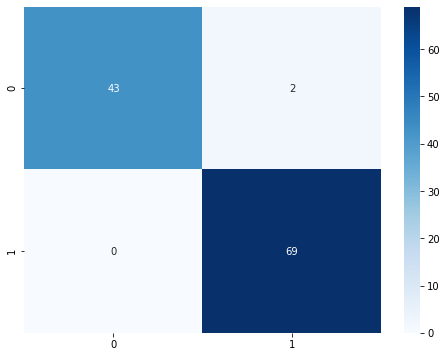

In [33]:
# =====================================================
# COMPLETAR ===========================================
# 
# your code here
lossAdam2, accuracyAdam2 = modelAdam2.evaluate(X_test, y_test)
print('Test loss:', lossAdam2)
print('Test accuracy:', accuracyAdam2)
y_pred_Adam2 = modelAdam2.predict_classes(X_test)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_pred_Adam2,y_test), cmap = 'Blues',annot = True)
# =====================================================

Una vez obtenidos los resultados para todos los modelos, compare el desempeño entre arquitecturas y optimizadores. ¿A que cree que se deben los resultados obtenidos?

Varias consideraciones 1- Adam y RMSProp generalmente muestran un mejor rendimiento con comparacion con SGD y Adagrad, esto pude deberse a que ajustan la taza de aprendizaje, escapando asi de minimos locales  2- Al pasar de la arquitectura 1 a la arquitectura 2 se evidencia una mejora ligera en el loss y el accuracy, eso puede deberse a que una arquitectura con menos capas y mas neuronas por capa puede facilitar la propagacion del gradiente, evitando que tome caminos no optimos. 3- Los optimizadores Adam y RMSProp tienden a funcionar mejor con arquitecturas menos profundas y mas anchas